# Creating and saving a randomly generated task dataset 

### Imports

In [1]:
import sys
sys.path.append('../')

from wisdom import make
from wisdom import read_write
import wisdom.envs.shapenet.task_generator as tg

import os
import glob
import json
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Parameter Initialization

- Here we initialize the parameters which control the random task generation

In [21]:
output_dir = 'outputs/trials/random' # the output directory
stim_dir = '../data/shapenet_handpicked_train' # stimulus set
n_tasks = 10 # number of tasks to be generated
n_trials = 100 # number of trials per task

env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir
)
print(env.env_spec.auto_gen_config)

# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

{'op_dict': {'Select': {'n_downstream': 4, 'downstream': ['GetLoc', 'GetCategory', 'GetObject'], 'same_children_op': False, 'min_depth': 1, 'min_op': 1}, 'GetCategory': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetLoc': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetObject': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'IsSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'NotSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'And': {'n_downstream': 2, 'downstream': ['IsSame', 'NotSame', 'And', 'Or'], 'same_children_op': False, 'min_de

- Generate the random tasks and write them to the output directory

In [22]:
# Randomly generate tasks
tasks = env.generate_tasks(n_tasks)

- Generate task trials (note the  mode)

In [ ]:
# Generate trials from tasks
for t in tasks:
    _, (_, temporal_task) = t
    for i in range(n_trials):
        trials = env.generate_trials(tasks=[temporal_task], mode='train')
        imgs, _, info_dict = trials[0]
        read_write.write_trial(imgs, info_dict, output_dir + f'/trial{i}')

instruction  observe object 1, delay, observe object 2, delay, identity of object 2 not equals identity of object 1?
answers:  ['null', 'null', 'null', 'null', 'null', 'false']


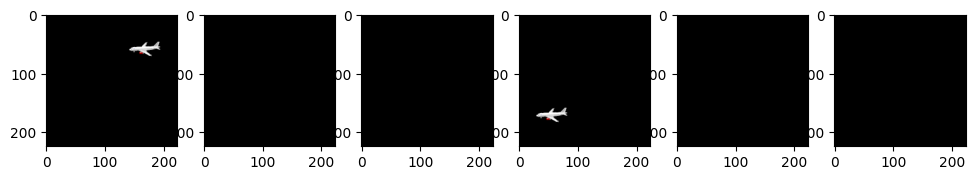

In [24]:
# display trial frame sequence
images = []
for img_path in sorted(glob.glob(output_dir + '/trial7/frames/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open(output_dir + '/trial7/frames/task_info.json') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])